<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/MachineLearning/Assignment_39/Titanic_Col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/MyDrive/Colab Notebooks/Titanic Dataset/train.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
#PreProcessing
train= train.replace(["female" , "male"] , [0 , 1])
train = train.replace(["C" , "S" , "Q"] , [0 , 1 , 2])
train = train.fillna(0)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0


In [5]:
Y_train =  np.array(train[['Survived']])
X_train = np.array(train[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked']])
print(X_train.shape , Y_train.shape)

(891, 7) (891, 1)


In [6]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7,activation='sigmoid'),
                                    tf.keras.layers.Dense(8,activation='relu'),
                                    tf.keras.layers.Dense(6,activation='relu'),
                                    tf.keras.layers.Dense(4,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='softmax')
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
output=model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 1s 1ms/step - loss: 0.7194 - accuracy: 0.4299
Epoch 2/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.6038
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6700
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6723
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6801
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6891
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6970
Epoch 8/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6914
Epoch 9/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.6936
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6902
Epoch 11/

Text(0, 0.5, 'Loss')

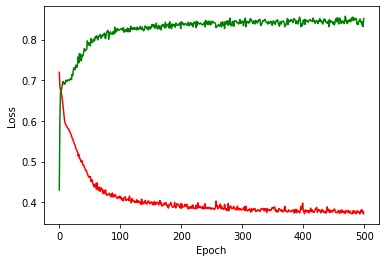

In [9]:
plt.plot(output.history['loss'], c = 'red')
plt.plot(output.history['accuracy'], c ='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [10]:
test = pd.read_csv('drive/MyDrive/Colab Notebooks/Titanic Dataset/test.csv')
test = test.replace(['female','male'],[0, 1])
test = test.replace(['S','C','Q'],[0, 1, 2])
test=test.fillna(0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0


In [11]:
survived = pd.read_csv('drive/MyDrive/Colab Notebooks/Titanic Dataset/gender_submission.csv')
survived.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [12]:
X_test = np.array(test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
Y_test = np.array(survived[['Survived']])
print(X_train.shape , Y_train.shape)

(891, 7) (891, 1)


In [13]:
from keras import layers
layer = layers.Normalization()
layer.adapt(X_test)
X_test = layer(X_test).numpy()

In [14]:
acc=model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9139


In [15]:
Kelly=np.array([3,1,27,0,0,8.6,0])
Kelly=Kelly.reshape(1,7)
y_pred=model.predict(Kelly)
prediction=np.argmax(y_pred)
print('prediction  ----> ',prediction)

prediction  ---->  0
